##### Install Dependencies

In [ ]:
!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')

### **Part 1 - Setup Exercise**

##### Load dependencies

In [1]:
# data
import numpy as np
import pandas as pd

# Machine Learning
import keras
import ml_edu.experiment
import ml_edu.results

# Visualization
import plotly.express as px

2025-08-14 12:35:33.539016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755174933.683058  304888 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755174933.713942  304888 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755174933.966184  304888 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755174933.966298  304888 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755174933.966301  304888 computation_placer.cc:177] computation placer alr

##### Load dependencies

In [57]:
chicago_taxi_dataset = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv')
chicago_taxi_dataset

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31689,05/17/2022 1:15:00 PM,05/17/2022 1:30:00 PM,13.25,739,13.06,63.6,NaN,NaN,75.0,28.0,32.50,0.00,0.0,0.0,0.0,32.50,Prcard,Blue Ribbon Taxi Association
31690,05/17/2022 9:45:00 PM,05/17/2022 10:15:00 PM,21.75,1740,30.90,63.9,NaN,NaN,76.0,NaN,44.50,10.00,13.9,0.0,27.5,82.00,Credit Card,Choice Taxi Association
31691,05/18/2022 3:45:00 AM,05/18/2022 4:00:00 AM,3.75,687,12.21,64.0,NaN,NaN,22.0,NaN,30.75,0.00,0.0,0.0,0.0,30.75,Prcard,Sun Taxi
31692,05/16/2022 2:45:00 PM,05/16/2022 3:30:00 PM,14.75,2040,36.60,64.6,NaN,NaN,76.0,7.0,41.75,11.55,25.2,0.0,4.0,57.30,Credit Card,"Taxicab Insurance Agency, LLC"


##### Update Dataframe

In [58]:
training_df = chicago_taxi_dataset.loc[:,('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]
training_df.head()

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0


### **Part 2 - Dataset Exploration**

##### View dataset statistics
A large part of most machine learning projects is getting to know your data. In this step, you will use the `DataFrame.describe` method to view descriptive statistics about the dataset and answer some important questions about the data.

##### View dataset statistics


In [59]:
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [60]:
training_df.isnull().sum().sum()

np.int64(0)

##### Generate a correlation matrix
An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label).


- `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
- `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
- `0.0`: no correlation; the two columns are [not linearly related](https://en.wikipedia.org/wiki/Correlation#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power.



Check your understanding by answering these questions:
- Which feature correlates most strongly to the label FARE?
- Which feature correlates least strongly to the label FARE?


##### Code - View correlation matrix

In [61]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


##### Visualize relationships in dataset

Sometimes it is helpful to visualize relationships between features in a dataset; one way to do this is with a pair plot. A pair plot generates a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.

##### Code - View pairplot

In [7]:
px.scatter_matrix(training_df, dimensions=['FARE', 'TRIP_MILES', 'TRIP_SECONDS'])

### **Part 3 - Train Model**

##### Define functions to build and train a model


In [8]:
def create_model(settings: ml_edu.experiment.ExperimentSettings, metrics: list[keras.metrics.Metric]) -> keras.Model:
    """
    Create and compile simple linear regression model.
    """
    
    # Describe the topography of the model.
    # The topography of a simple lienar regression model is a single node in sigle layer.
    inputs = {name: keras.Input(shape=(1,), name = name) for name in settings.input_features}
    concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
    outputs = keras.layers.Dense(units=1)(concatenated_inputs)
    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model topography into code that model can efficiently execute. Configure training to minimize the model's mean squared error.
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate), loss='mean_squared_error', metrics=metrics)

    print(model.summary())

    return model

def train_model(experiment_name:str, model:keras.Model, dataset: pd.DataFrame, lable_name:str, settings: ml_edu.experiment.ExperimentSettings) ->ml_edu.experiment.Experiment:
    """
    Train the model by fedding the data
    """

    # Feed the model the features and the lable
    # The model will train on specified number of epochs
    features = {name: dataset[name].values for name in settings.input_features}
    lables = dataset[lable_name].values
    history = model.fit(x = features, y = lables, batch_size=settings.batch_size,epochs=settings.number_epochs)

    return ml_edu.experiment.Experiment(name=experiment_name, settings=settings,model=model, epochs=history.epoch, metrics_history=pd.DataFrame(history.history))


##### Experiment 1

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ TRIP_MILES (InputLayer)         │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_8 (Concatenate)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1131.9631 - rmse: 33.6323
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 710.4137 - rmse: 26.6271
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 376.0704 - rmse: 19.3662
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 155.4295 - rmse: 12.4280
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 38.5152 - rmse: 6.1490
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.0166 - rmse: 3.9925
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14.9226 - rmse: 3.8563
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.8900 - rmse: 3.8565
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.5473 - rmse: 3.8012
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.9508 - rmse: 3.8613
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.7122 - rmse: 3.8307
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8929 - 

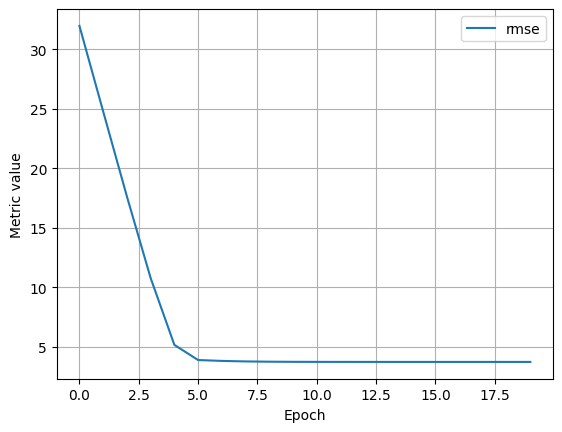

In [48]:
settings_1 = ml_edu.experiment.ExperimentSettings(learning_rate=0.001, number_epochs=20, batch_size=50, input_features=['TRIP_MILES'])
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ TRIP_MILES (InputLayer)         │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_14 (Concatenate)    │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 716.8098 - rmse: 26.7727
Epoch 2/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 668.6094 - rmse: 25.8561
Epoch 3/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 639.7216 - rmse: 25.2918
Epoch 4/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 602.2178 - rmse: 24.5397
Epoch 5/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 570.8566 - rmse: 23.8903
Epoch 6/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 535.4590 - rmse: 23.1390
Epoch 7/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 497.1476 - rmse: 22.2964
Epoch 8/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 464.3764 - rmse: 21.5490
Epoch 9/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 433.9283 - rmse: 20.8307
Epoch 10/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 402.2382 - rmse: 20.0554
Epoch 11/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 375.8267 - rmse: 19.3857
Epoch 12/37
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 348.6729 - rmse: 18.6

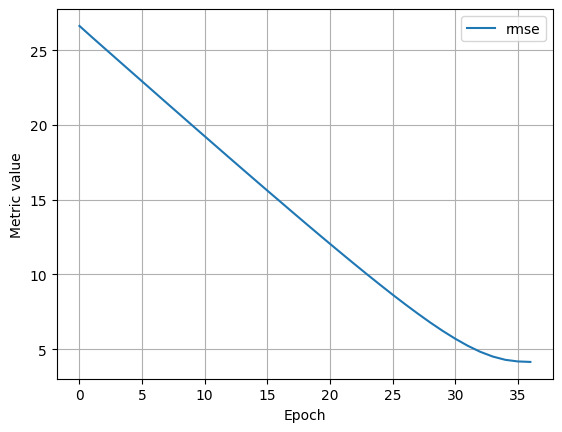

In [54]:
settings_2 = ml_edu.experiment.ExperimentSettings(learning_rate=0.001, number_epochs=37, batch_size=500, input_features=['TRIP_MILES',])
metrics = [keras.metrics.RootMeanSquaredError(name = 'rmse')]
model_2 = create_model(settings_2, metrics)
experiment_2 = train_model(experiment_name='one_feature_hyper', model=model_2, dataset=training_df, lable_name='FARE', settings=settings_2)

ml_edu.results.plot_experiment_metrics(experiment_2, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_2, training_df, 'FARE')

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ TRIP_MILES          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ TRIP_MINUTES        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 2)         │          0 │ TRIP_MILES[0][0], │
│ (Concatenate)       │                   │            │ TRIP_MINUTES[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │          3 │ concatenate_17[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 627.2196 - rmse: 24.8947
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 121.9592 - rmse: 11.0372
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 77.8228 - rmse: 8.8190
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 49.2271 - rmse: 7.0128
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30.8032 - rmse: 5.5430
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19.6859 - rmse: 4.4305
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.6644 - rmse: 3.8275
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.5707 - rmse: 3.3907
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.1266 - rmse: 3.7226
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.4230 - rmse: 3.3751
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.0136 - rmse: 3.6009
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.5889 - rmse:

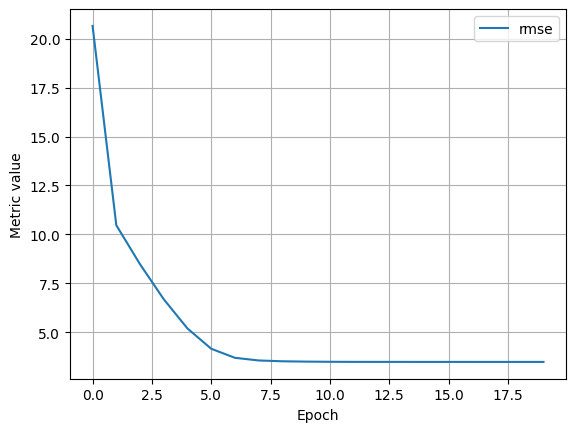

In [63]:
settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES', 'TRIP_MINUTES']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

training_df['TRIP_MINUTES'] = training_df['TRIP_SECONDS']/60

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, training_df, 'FARE', settings_3)
ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, training_df, 'FARE')

### Compare models

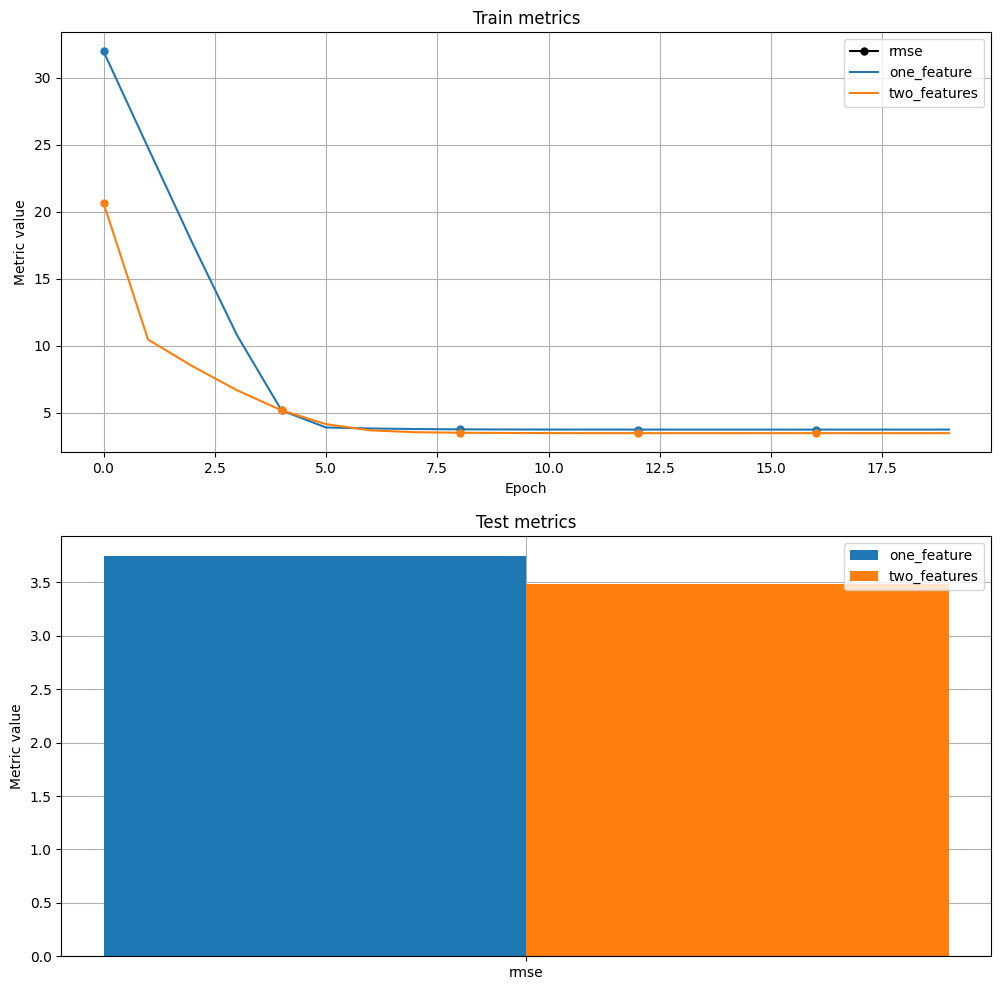

In [64]:
ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], training_df, training_df['FARE'].values)

## Part 4 - Validate Model

In [93]:
def format_currency(x):
    return f"{x:.2f}"

def build_batch(df:pd.DataFrame , batch_size):
    batch = df.sample(n=batch_size).copy()
    batch.set_index(np.arange(batch_size), inplace=True)
    return batch

def prefict_fare(model:keras.Model, df, featuers, lable, batch_size=50):
    batch = build_batch(df, batch_size)
    predict_values = model.predict_on_batch(x={name: batch[name].values for name in featuers})

    data = {'PREDICTED_FARE':[], 'OBSERVED_FARE':[], 'L1_LOSS':[], featuers[0]:[], featuers[1]:[]}

    for i in range(batch_size):
        prediced = predict_values[i][0]
        observed = batch.at[i, lable]
        data['PREDICTED_FARE'].append(format_currency(prediced))
        data['OBSERVED_FARE'].append(format_currency(observed))
        data['L1_LOSS'].append(format_currency(abs(prediced - observed)))
        data[featuers[0]].append(batch.at[i, featuers[0]])
        data[featuers[1]].append(batch.at[i, featuers[1]])
    
    output_df = pd.DataFrame(data)
    return output_df

def show_predection(output):
    header = '-' * 80
    banner = header + '\n' + '|' + 'PREDICTION'.center(78) + '|' + '\n' + header
    print(banner)
    print(output)
    return

##### Code - Make predictions